In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Conv2D, BatchNormalization, Concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf 

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
os.chdir("/content/drive/My Drive/iste_project/att-database-of-faces")
!ls

README	s11  s14  s17  s2   s22  s25  s28  s30	s33  s36  s39  s5  s8
s1	s12  s15  s18  s20  s23  s26  s29  s31	s34  s37  s4   s6  s9
s10	s13  s16  s19  s21  s24  s27  s3   s32	s35  s38  s40  s7  saved


In [0]:
main = []
for i in range(1,41):
  for j in range(1,11):
    path = "s" + str(i) + "/" + str(j) + ".pgm"
    img = cv2.imread(path,0)
    main.append(img)

In [5]:
main = np.array(main)
print(main.shape)
main = np.reshape(main,(40,10,112,92))
print(main.shape)

(400, 112, 92)
(40, 10, 112, 92)


Candidate number 24 ,image number 6


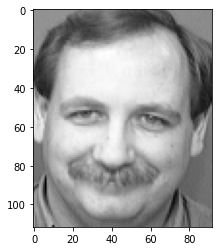

Candidate number 15 ,image number 3


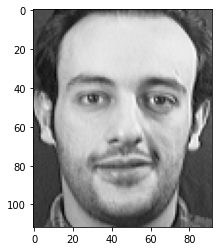

Candidate number 17 ,image number 9


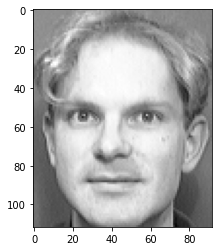

Candidate number 11 ,image number 0


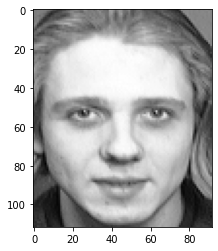

Candidate number 0 ,image number 3


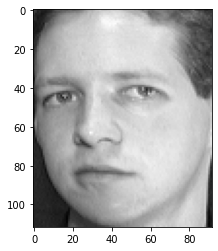

In [6]:
for n in range(5):
  i,j = np.random.randint(0,40), np.random.randint(0,10)
  print("Candidate number",i,",image number",j)
  plt.imshow(main[i,j], cmap = 'gray')
  plt.show()

In [7]:
ident = []
for i in range(40):
  for j in range(10):
    for k in range(j+1, 10):
      ident.append([[i,j],[i,k],[1,1]])
ident = np.array(ident)
print(ident.shape)

(1800, 3, 2)


TP number  1230 :


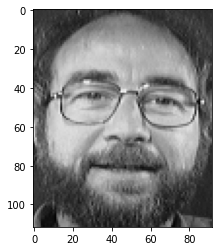

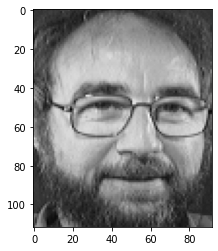

---------------------------
TP number  670 :


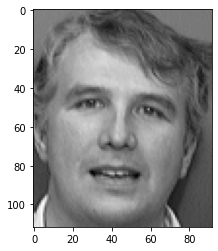

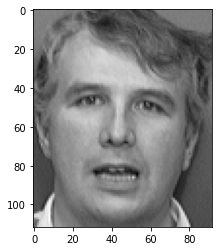

---------------------------
TP number  1629 :


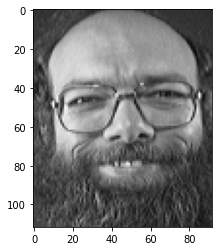

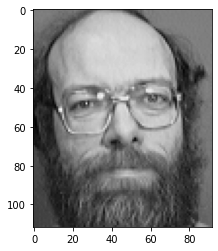

---------------------------
TP number  1262 :


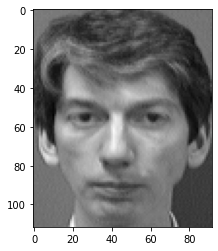

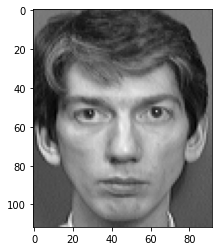

---------------------------
TP number  403 :


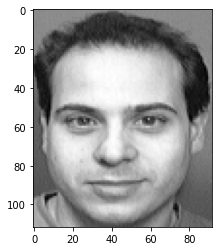

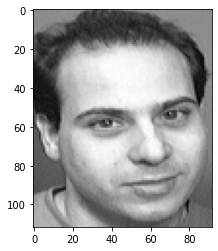

---------------------------


In [8]:
for i in range(5):
  p = np.random.randint(0,1800)
  print("TP number ", p,":")
  a = main[ident[p][0][0],ident[p][0][1]]
  b = main[ident[p][1][0],ident[p][1][1]]
  plt.imshow(a, cmap = 'gray')
  plt.show()
  plt.imshow(b, cmap = 'gray')
  plt.show()
  print("---------------------------")

In [9]:
diff = []
for n in range(1800):
  i = np.random.randint(40)
  j = i
  while(j == i):
    j = np.random.randint(40)
  k = np.random.randint(10)
  l = np.random.randint(10)
  diff.append([[i,k],[j,l],[0,0]])
diff = np.array(diff)
print(diff.shape)

(1800, 3, 2)


FP number  829 :


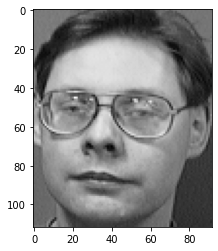

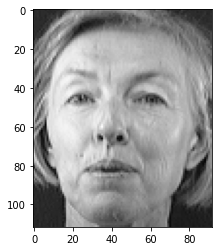

---------------------------
FP number  1704 :


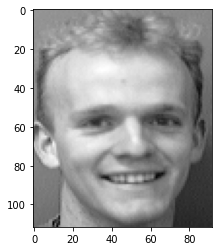

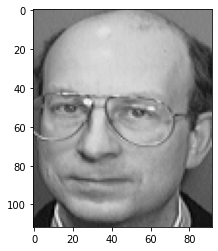

---------------------------
FP number  294 :


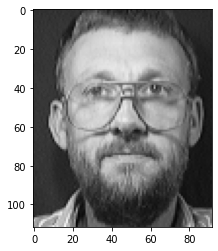

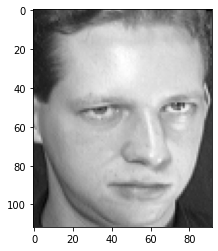

---------------------------
FP number  897 :


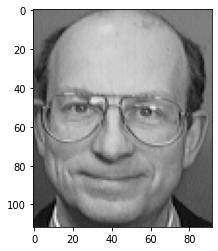

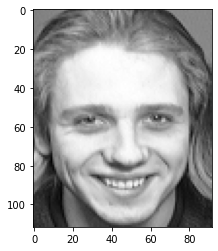

---------------------------
FP number  919 :


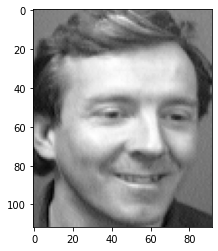

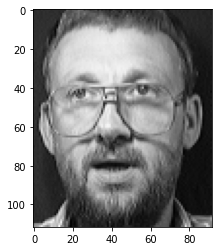

---------------------------


In [10]:
for i in range(5):
  p = np.random.randint(0,1800)
  print("FP number ", p,":")
  a = main[diff[p][0][0],diff[p][0][1]]
  b = main[diff[p][1][0],diff[p][1][1]]
  plt.imshow(a, cmap = 'gray')
  plt.show()
  plt.imshow(b, cmap = 'gray')
  plt.show()
  print("---------------------------")

In [0]:
def create_ds(main, data):
  ds = []
  for i in range(data.shape[0]):
    ds.append(main[data[i][0][0], data[i][0][1]])
    ds.append(main[data[i][1][0], data[i][1][1]])
  return ds

In [12]:
data = np.concatenate((ident, diff), axis = 0)
np.random.shuffle(data)
print('data_shape = ',data.shape)
ds = np.array(create_ds(main, data))
ds = np.reshape(ds, (int(ds.shape[0]/2), 2, 1, ds.shape[1], ds.shape[2]))
print('dataset_shape = ',ds.shape)

X = ds
Y = data[:,2,0]
Y = np.reshape(Y, (Y.shape[0],1))
print('labels_shape = ',Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25)
print('x_train_shape = ',x_train.shape, '\ny_train_shape = ', y_train.shape)
print('x_test_shape = ', x_test.shape, '\ny_test_shape = ', y_test.shape)

data_shape =  (3600, 3, 2)
dataset_shape =  (3600, 2, 1, 112, 92)
labels_shape =  (3600, 1)
x_train_shape =  (2700, 2, 1, 112, 92) 
y_train_shape =  (2700, 1)
x_test_shape =  (900, 2, 1, 112, 92) 
y_test_shape =  (900, 1)


Pair number  3058 :
Identical pair


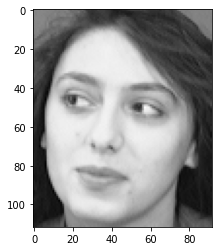

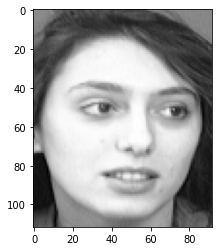

---------------------------
Pair number  50 :
Different pair


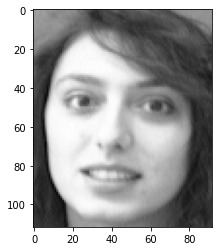

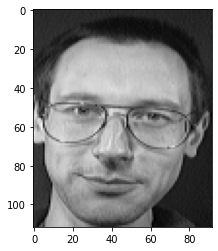

---------------------------
Pair number  530 :
Different pair


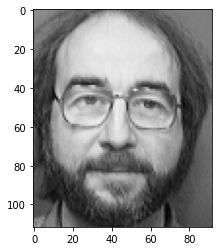

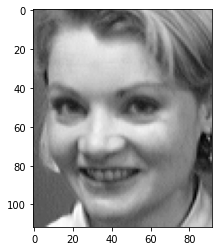

---------------------------
Pair number  1393 :
Identical pair


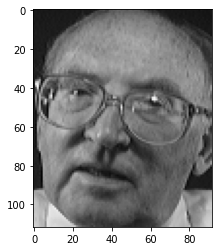

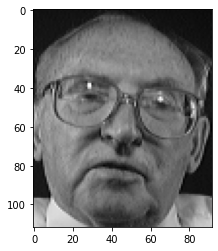

---------------------------
Pair number  326 :
Identical pair


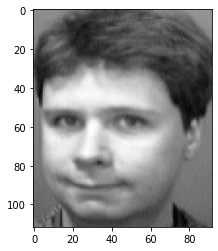

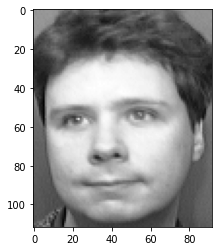

---------------------------
Pair number  1171 :
Identical pair


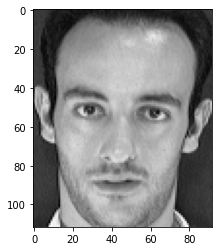

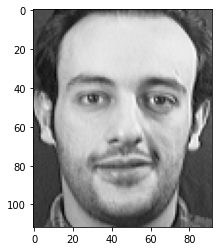

---------------------------
Pair number  1687 :
Different pair


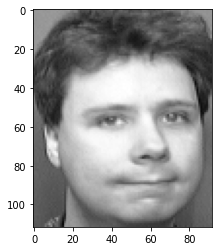

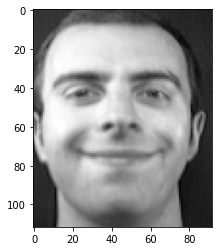

---------------------------
Pair number  2629 :
Identical pair


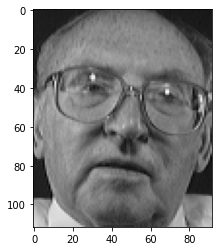

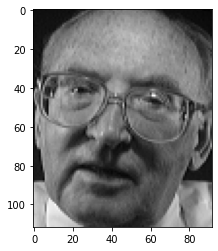

---------------------------
Pair number  2796 :
Different pair


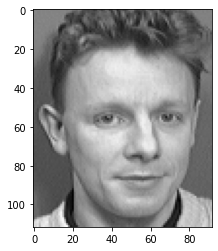

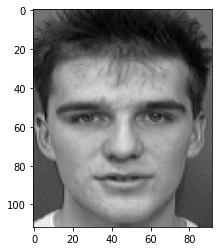

---------------------------
Pair number  1453 :
Identical pair


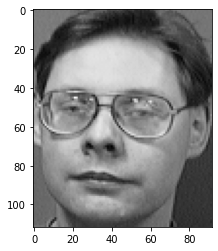

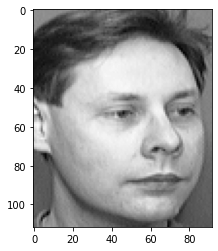

---------------------------


In [13]:
for i in range(10):
  p = np.random.randint(0,3600)
  print("Pair number ", p,":")
  if(Y[p] == 1):
    print("Identical pair")
  if(Y[p] == 0):
    print("Different pair")  
  a = X[p][0][0]
  b = X[p][1][0]
  plt.imshow(a, cmap = 'gray')
  plt.show()
  plt.imshow(b, cmap = 'gray')
  plt.show()
  print("---------------------------")

In [0]:
def base_net(ishape):
  s = Sequential(name = 'core_network')
  
  nfil = [4, 8, 16]
  ksize = 3
  
  s.add(Conv2D(filters = 64, kernel_size = (7,7),strides=2, input_shape = ishape, padding = 'valid', activation = 'relu', data_format = 'channels_first', name = 'Conv1'))
  s.add(MaxPooling2D(pool_size = (3,3),strides=2, data_format = 'channels_first', name = 'Pool1'))
  s.add(BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,name='rnorm1'))


  s.add(Conv2D(filters = 64, kernel_size = (1,1),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv2a'))
  s.add(Conv2D(filters = 192, kernel_size = (3,3),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv2'))
  s.add(BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,name='rnorm2'))
  s.add(MaxPooling2D(pool_size = (3,3),strides=2, data_format = 'channels_first', name = 'Pool2'))

  s.add(Conv2D(filters = 192, kernel_size = (1,1),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv3a'))
  s.add(Conv2D(filters =384 , kernel_size = (3,3),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv3'))
  s.add(MaxPooling2D(pool_size = (3,3),strides=2, data_format = 'channels_first', name = 'Pool3'))
  
  s.add(Conv2D(filters = 384, kernel_size = (1,1),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv4a'))
  s.add(Conv2D(filters = 256, kernel_size = (3,3),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv4'))
  s.add(Conv2D(filters = 256, kernel_size = (1,1),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv5a'))
  s.add(Conv2D(filters = 256, kernel_size = (3,3), strides=1,input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv5'))
  s.add(Conv2D(filters = 256, kernel_size = (1,1),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv6a'))
  s.add(Conv2D(filters = 256, kernel_size = (3,3),strides=1, input_shape = ishape, padding = 'same', activation = 'relu', data_format = 'channels_first', name = 'Conv6'))
  s.add(MaxPooling2D(pool_size = (3,3),strides=2,data_format = 'channels_first', name = 'Pool4'))
  Concatenate([s])
  
  


  s.add(Dense(32, activation = 'relu', name = 'fc1'))

  s.add(Dense((32), activation = 'relu', name = 'fc2'))
  
  s.add(Dense(1, activation = 'relu', name = 'Dense50'))
  
  return s

In [0]:
img_shape = x_train.shape[2:]
img_a = Input(shape = img_shape, name = 'Input1')
img_b = Input(shape = img_shape, name = 'Input2')

net = base_net(img_shape)
feat_vecs_a = net(img_a)
feat_vecs_b = net(img_b)

In [24]:
net.summary()

Model: "core_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 64, 53, 43)        3200      
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 64, 26, 21)        0         
_________________________________________________________________
rnorm1 (BatchNormalization)  (None, 64, 26, 21)        256       
_________________________________________________________________
Conv2a (Conv2D)              (None, 64, 26, 21)        4160      
_________________________________________________________________
Conv2 (Conv2D)               (None, 192, 26, 21)       110784    
_________________________________________________________________
rnorm2 (BatchNormalization)  (None, 192, 26, 21)       768       
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 192, 12, 10)      